<a href="https://colab.research.google.com/github/annaqas/projects_codecademy/blob/main/Food_Wheel_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prepare analysis**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Analyze Food Wheel Cuisines**

In [2]:
# Create data frames and inspect - restaurants
restaurants = pd.read_csv('/content/sample_data/restaurants.csv')
restaurants.head()

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Roberta’s,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


In [9]:
# Types od cuisines in dataset
print(restaurants.cuisine.unique())
restaurants.cuisine.nunique()

['Korean' 'Chinese' 'Pizza' 'Vegetarian' 'Italian' 'Japanese' 'American']


7

In [17]:
# Number of the restauramts by cuisine
n_cuisines = restaurants.groupby('cuisine').name.count().reset_index()
n_cuisines

,cuisine,name
0,American,10
1,Chinese,11
2,Italian,8
3,Japanese,4
4,Korean,3
5,Pizza,4
6,Vegetarian,4


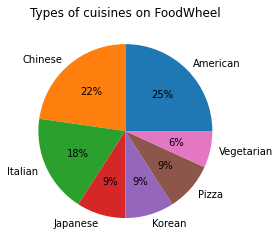

In [20]:
plt.pie(restaurants.cuisine.value_counts(), labels = n_cuisines.cuisine.values, autopct='%d%%')
plt.title('Types of cuisines on FoodWheel')
plt.show()

The cuisines more common are American(25%), Chinese(22%) and Italian(18%).

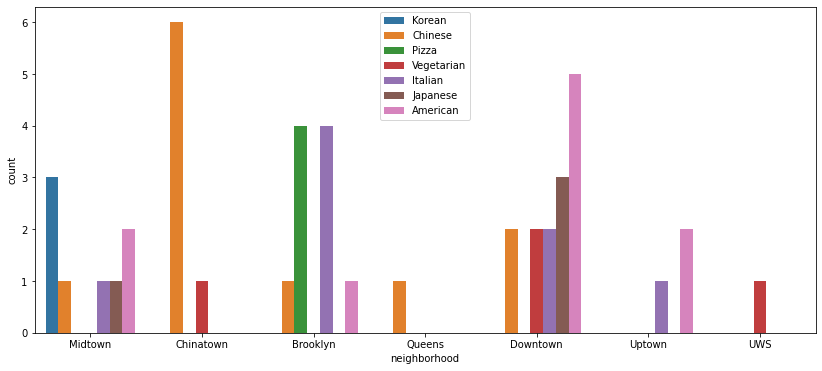

In [36]:
plt.figure(figsize=(14,6))
sns.countplot(x='neighborhood', hue='cuisine', data=restaurants)
plt.legend(loc = 9)
plt.show()

The distribuiton on neighborhood are interesting. Some neighborhood are distinguised by their cuisine as Chinatown has a higher number of chinese cuisine, obviously. Midtown are the only that have korean cuisine, and Brooklyn loves pizza and italian cuisine. 

# **Analyze orders on FoodWheel**

In [7]:
# Create data frames - orders
orders = pd.read_csv('/content/sample_data/orders.csv')
orders.head()

,id,customer_id,date,price
0,1,61,6-18-2017,13.0
1,2,210,5-8-2017,21.0
2,3,0,9-7-2017,33.0
3,4,66,7-7-2017,19.0
4,5,65,4-26-2017,13.0


In [38]:
#Create a month column to analyze the number of orders by month
month = lambda x : x.split('-')[0]
orders['month'] = orders.date.apply(month)
orders

,id,customer_id,date,price,month
0,1,61,6-18-2017,13.0,6
1,2,210,5-8-2017,21.0,5
2,3,0,9-7-2017,33.0,9
3,4,66,7-7-2017,19.0,7
4,5,65,4-26-2017,13.0,4
...,...,...,...,...,...
495,496,152,9-29-2017,22.0,9
496,497,82,4-7-2017,13.0,4
497,498,61,9-28-2017,25.0,9
498,499,98,8-13-2017,20.0,8


In [41]:
# Total order by months
total_order_by_month = orders.groupby('month').price.sum().reset_index()
total_order_by_month

,month,price
0,4,836.0
1,5,1263.0
2,6,1394.0
3,7,1405.0
4,8,1544.0
5,9,2508.0


In [39]:
# Calculate the average order by month
mean_order = orders.groupby('month').price.mean().reset_index()
mean_order

,month,price
0,4,9.609195
1,5,14.858824
2,6,15.152174
3,7,18.012821
4,8,21.150685
5,9,29.505882


In [40]:
# Calculate the standard deviation of the average order
std_order = orders.groupby('month').price.std().reset_index()
std_order

,month,price
0,4,2.562504
1,5,3.395210
2,6,2.835934
3,7,2.848985
4,8,4.455556
5,9,4.518806


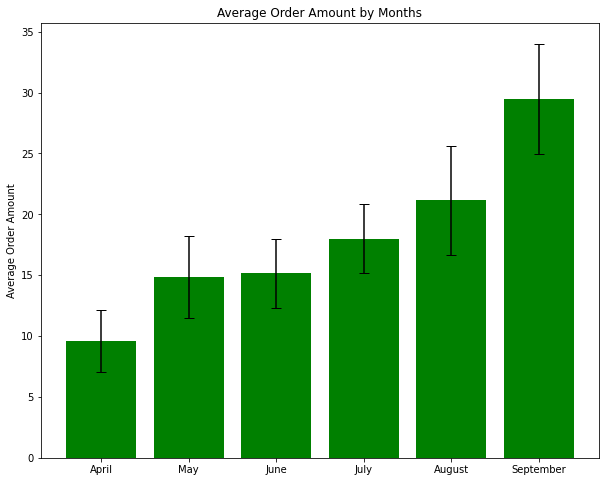

In [48]:
# Create a error bar
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(range(len(mean_order)), mean_order.price, yerr=std_order.price, capsize=5, color='g')
ax.set_xticks(range(len(mean_order)))
ax.set_xticklabels(['April', 'May', 'June', 'July', 'August', 'September'])
plt.ylabel("Average Order Amount")
plt.title('Average Order Amount by Months')
plt.show()

Average sales value is increasing every month.

# **Customer orders**

In [50]:
customer_amount = orders.groupby('customer_id').price.sum().reset_index()
customer_amount

,customer_id,price
0,0,83.0
1,2,11.0
2,3,65.0
3,4,32.0
4,5,119.0
...,...,...
219,245,68.0
220,246,16.0
221,247,35.0
222,248,89.0


Text(0.5, 1.0, 'Amount spent by customer on FoodWheel')

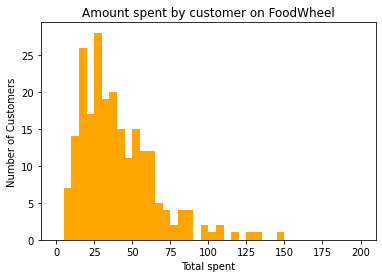

In [59]:
plt.hist(customer_amount.price.values, range = (0, 200), bins = 40, color='orange')
plt.xlabel('Total spent')
plt.ylabel('Number of Customers')
plt.title('Amount spent by customer on FoodWheel')

Most customers have a total spend up to $100.

# **Challenge**
Restaurant count for each neighborhood

In [77]:
count_restaurants = restaurants.neighborhood.value_counts()
print(count_restaurants)
count_restaurants.values

Downtown     14
Brooklyn     10
Midtown       8
Chinatown     7
Uptown        3
Queens        1
UWS           1
Name: neighborhood, dtype: int64


array([14, 10,  8,  7,  3,  1,  1])

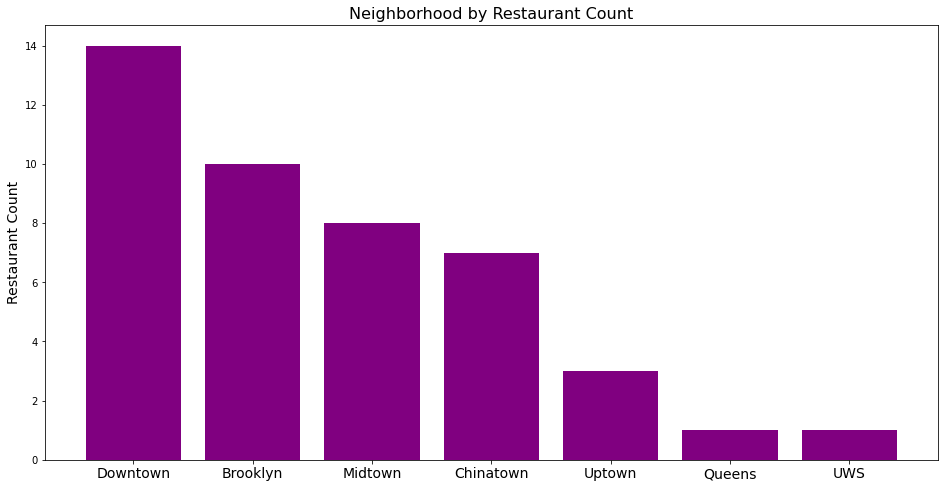

In [83]:
fig, ax = plt.subplots(figsize=(16,8))
plt.bar(restaurants['neighborhood'].unique(), restaurants['neighborhood'].value_counts().values, color='purple')
ax.set_xticks(range(len(restaurants['neighborhood'].unique())))
ax.set_xticklabels(['Downtown', 'Brooklyn', 'Midtown', 'Chinatown', 'Uptown', 'Queens', 'UWS'], fontsize=14)
plt.ylabel('Restaurant Count', fontsize=14)
plt.title('Neighborhood by Restaurant Count', fontsize=16)
plt.show()

Downtown is a neighborhood with more restaurants.